### Data Analysis of New York Mets (2004–2012)

Data analysis on the New York Mets (teamID = 'NYN') baseball team from 2004 to 2012 using sabermetrics concepts like the Pythagorean Expectation to evaluate team performance.

### Load and Filter Team Data

These libraries support data manipulation (pandas, numpy), statistical analysis (scipy, statsmodels), and visualization (matplotlib, seaborn, plotnine).

Loads team statistics from Teams.csv.

Returns the shape (rows, columns) of the dataset.

In [87]:
import numpy as np
import pandas as pd
from plotnine import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from plotnine.ggplot import ggsave
import os

Teams = pd.read_csv('/content/Teams.csv')
np.shape(Teams)
Teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

### Filter New York Mets (teamID = 'NYN') from 2004 to 2012

Filters the Mets' seasons from 2004 to 2012.

Selects columns for year, teamID, Wins (W), and Losses (L).

Displays the selected columns.

In [88]:
mets = Teams[Teams['teamID'] == 'NYN']
my_mets = mets[(mets['yearID'] >= 2004) & (mets['yearID'] <= 2012)]
my_mets2 = my_mets[['yearID','teamID','W','L']]
print(my_mets2)

      yearID teamID   W   L
2469    2004    NYN  71  91
2498    2005    NYN  83  79
2528    2006    NYN  97  65
2558    2007    NYN  88  74
2588    2008    NYN  89  73
2618    2009    NYN  70  92
2648    2010    NYN  79  83
2678    2011    NYN  77  85
2708    2012    NYN  74  88


### Add Runs Data: RS and RA
Perform the same task without creating temporary data frames mets and my_mets:

Adds Runs Scored (R) and Runs Allowed (RA).

In [89]:
print(Teams[(Teams['teamID'] == 'NYN') & (Teams['yearID'] >= 2004) & (Teams['yearID'] <= 2012)][['yearID','teamID','W','L']])

      yearID teamID   W   L
2469    2004    NYN  71  91
2498    2005    NYN  83  79
2528    2006    NYN  97  65
2558    2007    NYN  88  74
2588    2008    NYN  89  73
2618    2009    NYN  70  92
2648    2010    NYN  79  83
2678    2011    NYN  77  85
2708    2012    NYN  74  88


filter and extract specific data from the full Teams dataset, focusing only on the New York Mets team (teamID == 'NYN') between the years 2004 and 2012

In [90]:
mets_ben = Teams[(Teams['teamID'] == 'NYN') & (Teams['yearID'] >= 2004) & (Teams['yearID'] <= 2012)][['yearID','teamID','W','L','R','RA']]
print(mets_ben)

      yearID teamID   W   L    R   RA
2469    2004    NYN  71  91  684  731
2498    2005    NYN  83  79  722  648
2528    2006    NYN  97  65  834  731
2558    2007    NYN  88  74  804  750
2588    2008    NYN  89  73  799  715
2618    2009    NYN  70  92  671  757
2648    2010    NYN  79  83  656  652
2678    2011    NYN  77  85  718  742
2708    2012    NYN  74  88  650  709


R: Runs Scored

RA: Runs Allowed.

In [91]:
mets_ben = mets_ben.rename(columns={"R": "RS"})
print(mets_ben)

      yearID teamID   W   L   RS   RA
2469    2004    NYN  71  91  684  731
2498    2005    NYN  83  79  722  648
2528    2006    NYN  97  65  834  731
2558    2007    NYN  88  74  804  750
2588    2008    NYN  89  73  799  715
2618    2009    NYN  70  92  671  757
2648    2010    NYN  79  83  656  652
2678    2011    NYN  77  85  718  742
2708    2012    NYN  74  88  650  709


### Calculate Actual Winning Percentage

In [92]:
mets_ben['WPct'] = mets_ben['W']/(mets_ben['W']+mets_ben['L'])
print(mets_ben)

      yearID teamID   W   L   RS   RA      WPct
2469    2004    NYN  71  91  684  731  0.438272
2498    2005    NYN  83  79  722  648  0.512346
2528    2006    NYN  97  65  834  731  0.598765
2558    2007    NYN  88  74  804  750  0.543210
2588    2008    NYN  89  73  799  715  0.549383
2618    2009    NYN  70  92  671  757  0.432099
2648    2010    NYN  79  83  656  652  0.487654
2678    2011    NYN  77  85  718  742  0.475309
2708    2012    NYN  74  88  650  709  0.456790


###  Calculate Pythagorean Expected Winning Percentage

This predicts a team's expected win % based on run differential.
In other words, it measures how many more (or fewer) runs a team scores than it allows.
Run differential gives a strong indication of team strength.

In [93]:
mets_ben['WPct_hat'] =  1 / (1 + (mets_ben['RA']/mets_ben['RS']) ** 2)
print(mets_ben)

      yearID teamID   W   L   RS   RA      WPct  WPct_hat
2469    2004    NYN  71  91  684  731  0.438272  0.466821
2498    2005    NYN  83  79  722  648  0.512346  0.553857
2528    2006    NYN  97  65  834  731  0.598765  0.565531
2558    2007    NYN  88  74  804  750  0.543210  0.534707
2588    2008    NYN  89  73  799  715  0.549383  0.555312
2618    2009    NYN  70  92  671  757  0.432099  0.439994
2648    2010    NYN  79  83  656  652  0.487654  0.503058
2678    2011    NYN  77  85  718  742  0.475309  0.483566
2708    2012    NYN  74  88  650  709  0.456790  0.456667


### Expected Wins (W_hat)
Converts expected win % to total expected wins. It is taking the predicted winning percentage (how often a team is expected to win), and turning it into an actual number of wins over a full season.

In [94]:
mets_ben['W_hat'] =  mets_ben['WPct_hat'] * (mets_ben['W'] + mets_ben['L'])
print(mets_ben)

      yearID teamID   W   L   RS   RA      WPct  WPct_hat      W_hat
2469    2004    NYN  71  91  684  731  0.438272  0.466821  75.625011
2498    2005    NYN  83  79  722  648  0.512346  0.553857  89.724909
2528    2006    NYN  97  65  834  731  0.598765  0.565531  91.615997
2558    2007    NYN  88  74  804  750  0.543210  0.534707  86.622554
2588    2008    NYN  89  73  799  715  0.549383  0.555312  89.960528
2618    2009    NYN  70  92  671  757  0.432099  0.439994  71.278955
2648    2010    NYN  79  83  656  652  0.487654  0.503058  81.495408
2678    2011    NYN  77  85  718  742  0.475309  0.483566  78.337706
2708    2012    NYN  74  88  650  709  0.456790  0.456667  73.980118


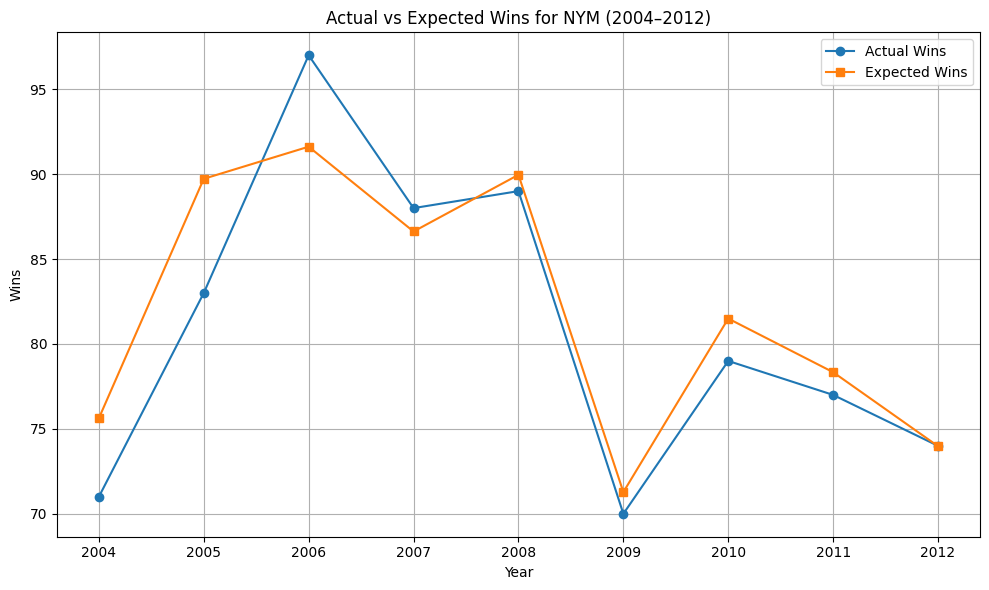

In [95]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mets_ben["yearID"], mets_ben["W"], label="Actual Wins", marker='o')
plt.plot(mets_ben["yearID"], mets_ben["W_hat"], label="Expected Wins", marker='s')

plt.title("Actual vs Expected Wins for NYM (2004–2012)")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Compare Actual vs Expected Performance

In [96]:
print(mets_ben[mets_ben['W'] >= mets_ben['W_hat']])

      yearID teamID   W   L   RS   RA      WPct  WPct_hat      W_hat
2528    2006    NYN  97  65  834  731  0.598765  0.565531  91.615997
2558    2007    NYN  88  74  804  750  0.543210  0.534707  86.622554
2708    2012    NYN  74  88  650  709  0.456790  0.456667  73.980118


In [97]:
print(mets_ben[mets_ben['W'] < mets_ben['W_hat']])

      yearID teamID   W   L   RS   RA      WPct  WPct_hat      W_hat
2469    2004    NYN  71  91  684  731  0.438272  0.466821  75.625011
2498    2005    NYN  83  79  722  648  0.512346  0.553857  89.724909
2588    2008    NYN  89  73  799  715  0.549383  0.555312  89.960528
2618    2009    NYN  70  92  671  757  0.432099  0.439994  71.278955
2648    2010    NYN  79  83  656  652  0.487654  0.503058  81.495408
2678    2011    NYN  77  85  718  742  0.475309  0.483566  78.337706


Lists seasons where Mets overperformed or underperformed relative to expectation.

Sorts seasons by actual win percentage from best to worst.

In [98]:
print(mets_ben.sort_values(by = 'WPct', ascending = False))

      yearID teamID   W   L   RS   RA      WPct  WPct_hat      W_hat
2528    2006    NYN  97  65  834  731  0.598765  0.565531  91.615997
2588    2008    NYN  89  73  799  715  0.549383  0.555312  89.960528
2558    2007    NYN  88  74  804  750  0.543210  0.534707  86.622554
2498    2005    NYN  83  79  722  648  0.512346  0.553857  89.724909
2648    2010    NYN  79  83  656  652  0.487654  0.503058  81.495408
2678    2011    NYN  77  85  718  742  0.475309  0.483566  78.337706
2708    2012    NYN  74  88  650  709  0.456790  0.456667  73.980118
2469    2004    NYN  71  91  684  731  0.438272  0.466821  75.625011
2618    2009    NYN  70  92  671  757  0.432099  0.439994  71.278955


### Compute Residual (Difference between Actual and Expected Wins)
- Positive Diff: Team won more games than expected.
- Negative Diff: Team won fewer than expected.

In [99]:
mets_ben['Diff'] = mets_ben.W - mets_ben.W_hat
print(mets_ben.sort_values(by = 'Diff', ascending = False))

      yearID teamID   W   L   RS   RA      WPct  WPct_hat      W_hat      Diff
2528    2006    NYN  97  65  834  731  0.598765  0.565531  91.615997  5.384003
2558    2007    NYN  88  74  804  750  0.543210  0.534707  86.622554  1.377446
2708    2012    NYN  74  88  650  709  0.456790  0.456667  73.980118  0.019882
2588    2008    NYN  89  73  799  715  0.549383  0.555312  89.960528 -0.960528
2618    2009    NYN  70  92  671  757  0.432099  0.439994  71.278955 -1.278955
2678    2011    NYN  77  85  718  742  0.475309  0.483566  78.337706 -1.337706
2648    2010    NYN  79  83  656  652  0.487654  0.503058  81.495408 -2.495408
2469    2004    NYN  71  91  684  731  0.438272  0.466821  75.625011 -4.625011
2498    2005    NYN  83  79  722  648  0.512346  0.553857  89.724909 -6.724909


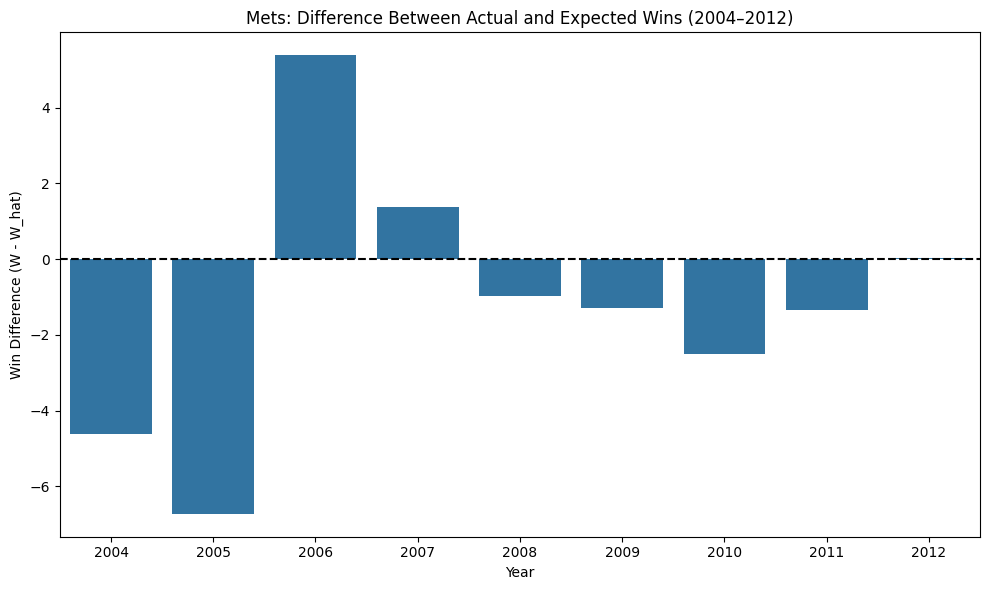

In [100]:
mets_ben_sorted = mets_ben.sort_values(by='Diff', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='yearID', y='Diff', data=mets_ben_sorted)

plt.axhline(0, color='black', linestyle='--')
plt.title('Mets: Difference Between Actual and Expected Wins (2004–2012)')
plt.xlabel('Year')
plt.ylabel('Win Difference (W - W_hat)')
plt.tight_layout()
plt.show()

### Summary Statistics
This tells you how the team performed overall:

Their average win count was about 81 wins per year.

Their best season had 97 wins, and the worst had 70.

The data has moderate variation (std ≈ 9.1).

In [101]:
mets_ben.W.describe()

,W
count,9.000000
mean,80.888889
std,9.102808
min,70.000000
25%,74.000000
50%,79.000000
75%,88.000000
max,97.000000


This helps assess whether the team overperformed or underperformed expectations.
- num_years: Number of seasons.
- total_W, total_L: Total wins and losses.
- total_WPct: Overall winning percentage.
- sum_resid: Sum of residuals (actual wins - predicted wins) over those years.



In [102]:
mets_summary = {
    'num_years' : [mets_ben.W.count()],
    'total_W' : [mets_ben.W.sum()],
    'total_L' : [mets_ben.L.sum()],
    'total_WPct' : [mets_ben.W.sum()/(mets_ben.W.sum()+mets_ben.L.sum())],
    'sum_resid' : [sum(mets_ben.W-mets_ben.W_hat)],
}

mets_summary = pd.DataFrame(mets_summary, index = ['summary'])
print(mets_summary)

         num_years  total_W  total_L  total_WPct  sum_resid
summary          9      728      730    0.499314 -10.641188


Adds a gm column indicating who the General Manager (GM) was for each season:
- Duquette for 2004
- Minaya for 2005–2010
- Alderson for 2011–2012

In [103]:
mets_ben['gm'] = mets_ben.apply(lambda row: 'Duquette' if row['yearID'] == 2004 else ('Alderson' if row['yearID'] >= 2011 else 'Minaya'), axis=1)
print(mets_ben)

      yearID teamID   W   L   RS   RA      WPct  WPct_hat      W_hat  \
2469    2004    NYN  71  91  684  731  0.438272  0.466821  75.625011   
2498    2005    NYN  83  79  722  648  0.512346  0.553857  89.724909   
2528    2006    NYN  97  65  834  731  0.598765  0.565531  91.615997   
2558    2007    NYN  88  74  804  750  0.543210  0.534707  86.622554   
2588    2008    NYN  89  73  799  715  0.549383  0.555312  89.960528   
2618    2009    NYN  70  92  671  757  0.432099  0.439994  71.278955   
2648    2010    NYN  79  83  656  652  0.487654  0.503058  81.495408   
2678    2011    NYN  77  85  718  742  0.475309  0.483566  78.337706   
2708    2012    NYN  74  88  650  709  0.456790  0.456667  73.980118   

          Diff        gm  
2469 -4.625011  Duquette  
2498 -6.724909    Minaya  
2528  5.384003    Minaya  
2558  1.377446    Minaya  
2588 -0.960528    Minaya  
2618 -1.278955    Minaya  
2648 -2.495408    Minaya  
2678 -1.337706  Alderson  
2708  0.019882  Alderson  


In [104]:
conditions = [
    (mets_ben['yearID'] == 2004),
    (mets_ben['yearID'] >= 2011)
]

choices = ['Duquette', 'Alderson']

mets_ben['gm'] = np.select(conditions, choices, default='Minaya')
print(mets_ben)

      yearID teamID   W   L   RS   RA      WPct  WPct_hat      W_hat  \
2469    2004    NYN  71  91  684  731  0.438272  0.466821  75.625011   
2498    2005    NYN  83  79  722  648  0.512346  0.553857  89.724909   
2528    2006    NYN  97  65  834  731  0.598765  0.565531  91.615997   
2558    2007    NYN  88  74  804  750  0.543210  0.534707  86.622554   
2588    2008    NYN  89  73  799  715  0.549383  0.555312  89.960528   
2618    2009    NYN  70  92  671  757  0.432099  0.439994  71.278955   
2648    2010    NYN  79  83  656  652  0.487654  0.503058  81.495408   
2678    2011    NYN  77  85  718  742  0.475309  0.483566  78.337706   
2708    2012    NYN  74  88  650  709  0.456790  0.456667  73.980118   

          Diff        gm  
2469 -4.625011  Duquette  
2498 -6.724909    Minaya  
2528  5.384003    Minaya  
2558  1.377446    Minaya  
2588 -0.960528    Minaya  
2618 -1.278955    Minaya  
2648 -2.495408    Minaya  
2678 -1.337706  Alderson  
2708  0.019882  Alderson  


Creates performance summaries by GM:
- Total wins/losses.
- Overall winning percentage.
- Sum of residuals (how far off the actual win count was from expected).
Sorting by sum_resid shows which GM oversaw more "lucky" or "unlucky" seasons.

Interpretation :
- All three GMs had teams that underperformed expectations based on run differential.
- Alderson's teams were closest to expectation (only -1.3 wins off).
- Minaya's teams played the most seasons and had the most total wins, but also underperformed most compared to their expected win total.

In [105]:
grouped = mets_ben.groupby('gm').agg(
    num_years=('W', 'size'),
    total_W=('W', 'sum'),
    total_L=('L', 'sum'),
)
grouped['total_WPct'] = grouped.total_W / (grouped.total_W + grouped.total_L)
grouped['sum_resid'] = mets_ben.groupby('gm').agg(diff=('Diff','sum'))
print(grouped.sort_values(by = 'sum_resid', ascending = False))

          num_years  total_W  total_L  total_WPct  sum_resid
gm                                                          
Alderson          2      151      173    0.466049  -1.317824
Duquette          1       71       91    0.438272  -4.625011
Minaya            6      506      466    0.520576  -4.698352


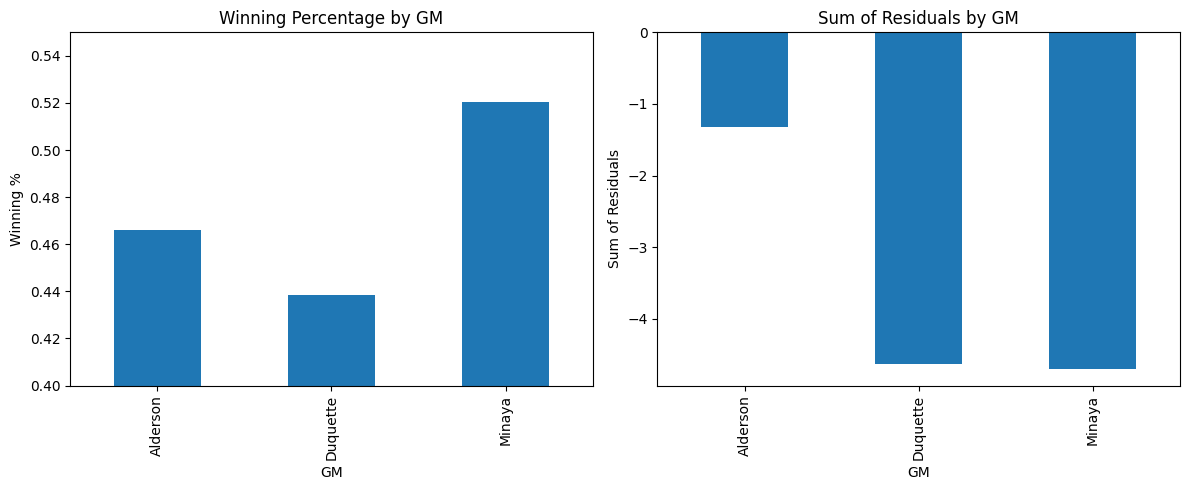

In [110]:
# Create side-by-side bar plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for Win Percentage
grouped['total_WPct'].plot(kind='bar', ax=ax[0])
ax[0].set_title('Winning Percentage by GM')
ax[0].set_ylabel('Winning %')
ax[0].set_ylim(0.4, 0.55)
ax[0].set_xlabel('GM')

# Bar plot for Sum of Residuals
grouped['sum_resid'].plot(kind='bar', ax=ax[1])
ax[1].set_title('Sum of Residuals by GM')
ax[1].set_ylabel('Sum of Residuals')
ax[1].set_xlabel('GM')

plt.tight_layout()
plt.show()

### Compare All MLB Franchises (2004–2012)
Repeats the same logic for all MLB teams, calculating:
- Predicted win % and win total using Pythagorean expectation.
- Difference between actual and expected wins (Diff).


In [107]:
mets_ben2 = Teams[(Teams['yearID'] >= 2004) & (Teams['yearID'] <= 2012)][['yearID','teamID','franchID','W','L','R','RA']]
mets_ben2 = mets_ben2.rename(columns={"R": "RS"})
mets_ben2['WPct'] = mets_ben2['W']/(mets_ben2['W']+mets_ben2['L'])
mets_ben2['WPct_hat'] =  1 / (1 + (mets_ben2['RA']/mets_ben2['RS']) ** 2)
mets_ben2['W_hat'] =  mets_ben2['WPct_hat'] * (mets_ben2['W'] + mets_ben2['L'])
mets_ben2['Diff'] = mets_ben2.W - mets_ben2.W_hat

### Group by Franchise and Summarize

Shows the 6 most underperforming franchises (negative residuals) — i.e., teams that lost more games than their run statistics predicted.

- How many seasons each franchise had.
- Their total wins, losses, and win percentage.
- How much they over/under-performed expectations (sum_resid).

Summary
- mets_summary : Summary stats for Mets from 2004–2012
- gm assignment	: Label each season with the GM in charge
- grouped by GM :	Evaluate GM performance based on wins and residuals
- mets_ben2 creation :	Prepare similar metrics for all MLB teams
- grouped2 analysis	: Rank franchises by performance versus Pythagorean expectations

In [108]:
grouped2 = mets_ben2.groupby('franchID').agg(
    num_years=('W', 'size'),
    total_W=('W', 'sum'),
    total_L=('L', 'sum'),
)
grouped2['total_WPct'] = grouped2.total_W / (grouped2.total_W + grouped2.total_L)
grouped2['sum_resid'] = mets_ben2.groupby('franchID').agg(diff=('Diff','sum'))
print((grouped2.sort_values(by = 'sum_resid', ascending = True)).head(6))

          num_years  total_W  total_L  total_WPct  sum_resid
franchID                                                    
TOR               9      717      740    0.492107 -29.160542
ATL               9      781      677    0.535665 -24.004657
COL               9      687      772    0.470870 -22.710302
CHC               9      706      750    0.484890 -14.543509
CLE               9      710      748    0.486968 -13.916844
NYM               9      728      730    0.499314 -10.641188


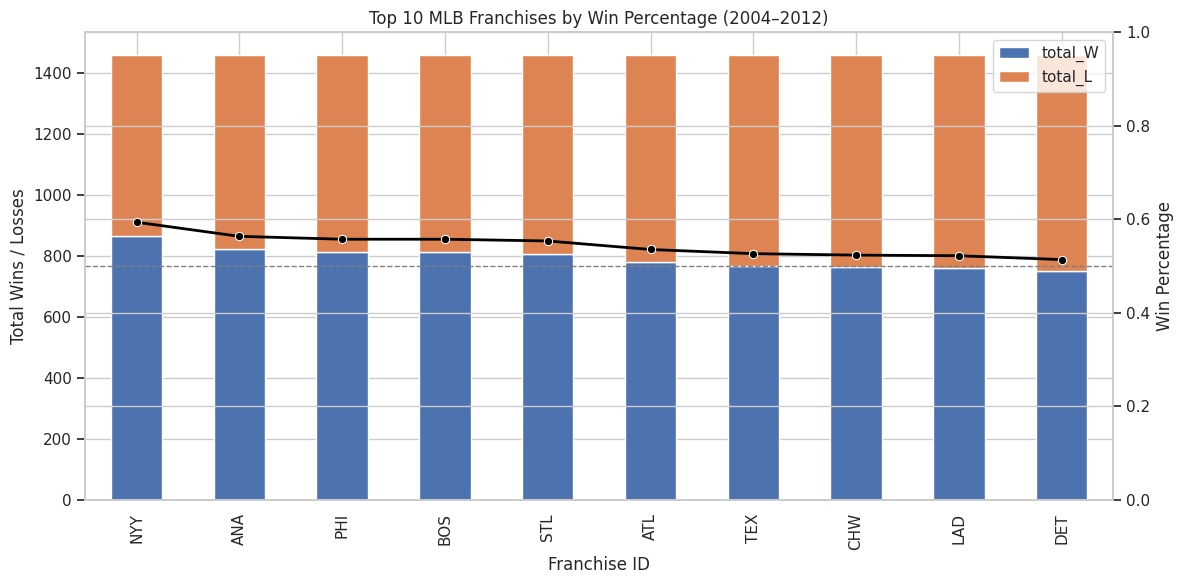

In [118]:
df_sorted = grouped2.sort_values('total_WPct', ascending=False).head(10)
fig, ax1 = plt.subplots(figsize=(12, 6))
df_sorted[['total_W', 'total_L']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Total Wins / Losses')
ax1.set_xlabel('Franchise ID')
ax1.set_title('Top 10 MLB Franchises by Win Percentage (2004–2012)')
ax2 = ax1.twinx()
sns.lineplot(data=df_sorted, x=df_sorted.index, y='total_WPct', ax=ax2, color='black', marker='o', linewidth=2)
ax2.set_ylabel('Win Percentage')
ax2.set_ylim(0, 1)
ax2.axhline(0.5, color='gray', linestyle='--', linewidth=1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

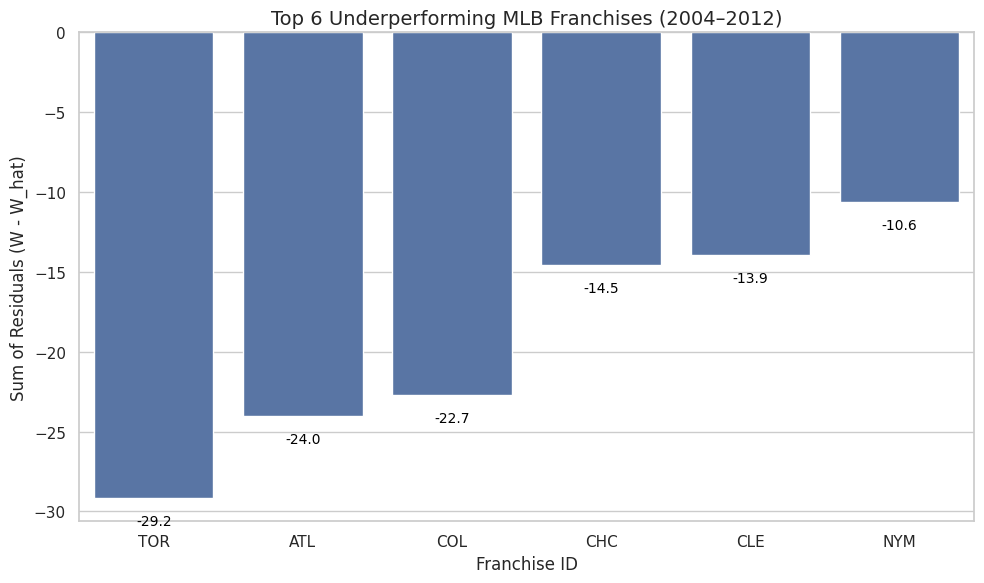

In [115]:
top6 = grouped2.sort_values(by='sum_resid', ascending=True).head(6).reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=top6, x='franchID', y='sum_resid')
plt.title('Top 6 Underperforming MLB Franchises (2004–2012)', fontsize=14)
plt.xlabel('Franchise ID')
plt.ylabel('Sum of Residuals (W - W_hat)')
for index, row in top6.iterrows():
    plt.text(index, row['sum_resid'] - 1, f"{row['sum_resid']:.1f}",
             color='black', ha="center", va="top", fontsize=10)
plt.tight_layout()
plt.show()

num_years: All the teams have data from 2004 to 2012, so the value is 9 for each tea

total_W:This is the total number of wins for each team during the 9 years.

total_L:This represents the total number of losses for each team during the same period.

total_WPct:It tells you how successful each team was overall. The win percentage is a value between 0 and 1, with a value closer to 1 indicating a better performance.


sum_resid: the difference between the actual wins (W) and the expected wins (W_hat). A negative value means the team underperformed, while a positive or smaller negative value means they were closer to or exceeded expectations.

- Toronto Blue Jays (TOR): They underperformed by a significant margin, winning 29 fewer games than expected based on their run differential.
- Atlanta Braves (ATL): They underperformed by 24 fewer games than expected.
- Colorado Rockies (COL): They underperformed by about 22 games.
- Chicago Cubs (CHC): They underperformed by about 14 games.
- Cleveland Indians (CLE): indicating a relatively smaller underperformance compared to the others.
- New York Mets (NYM): They underperformed the least in this group, but still below expectations.